<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/main/DSP_kr6_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Вычисление ОБПФ коэф. слева

In [ ]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from fractions import Fraction
# table = PrettyTable()
W = np.exp(-1j * np.pi / 4)
stage3 = np.array([0, 0, 2j, -2j,  1j, -3j, 3j, -1j])
stage2 = np.zeros(8, complex)
print('stage 3')

for n in range(8):
  # stage3[n]= final_sg[n]*final_h[n]
  print(n, ': ', np.round(stage3[n], 3))
print()

# ======================================================================

n = 0
m = 1

while m < 8:
  stage2[n] = (stage3[n] + stage3[m] * W ** 0)
  stage2[m] = (stage3[n] - stage3[m] * W ** 0)
  # print(f'n = {n}, {np.round(stage3[n], 2)} + {np.round(stage3[m], 2)} * {np.round(W ** 0, 2)}')
  # print(f'm = {m}, {np.round(stage3[n], 2)} - {np.round(stage3[m], 2)} * {np.round(W ** 0, 2)}')
  n += 2
  m += 2

print()

print('stage 2')

for n in range(8):
  print(n, ': ', np.round(stage2[n], 3))

# ======================================================================
stage1 = np.zeros(8, complex)

n = 0
m = 2
p = 0

for n in range(0, 2):
  stage1[n] = stage2[n] + stage2[m] * (W ** (-p))
  stage1[m] = stage2[n] - stage2[m] * (W ** (-p))
  # print(f'n = {n}, {np.round(stage2[n], 3)} + {np.round(stage2[m], 3)} * {np.round(W ** (-p), 3)}')
  # print(f'm = {m}, {np.round(stage2[n], 3)} - {np.round(stage2[m], 3)} * {np.round(W ** (-p), 3)}')
  m += 1
  p += 2

n = 4
m = 6
p = 0

for n in range(4, 6):
  stage1[n] = stage2[n] + stage2[m] * (W ** (-p))
  stage1[m] = stage2[n] - stage2[m] * (W ** (-p))
  # print(f'n = {n}, {np.round(stage2[n], 3)} + {np.round(stage2[m], 3)} * {np.round(W ** (-p), 3)}')
  # print(f'm = {m}, {np.round(stage2[n], 3)} - {np.round(stage2[m], 3)} * {np.round(W ** (-p), 3)}')
  m += 1
  p += 2

print()
print('stage 1')

for n in range(8):
  print(n, ': ', np.round(stage1[n], 3))

# ======================================================================

orig_sg = np.zeros(8, complex)

n = 0
m = 4

for n in range(4):
  orig_sg[n] = stage1[n] + stage1[m] * (W ** (-n))
  orig_sg[m] = stage1[n] - stage1[m] * (W ** (-n))
  # print(f'n = {n}, {np.round(stage1[n], 3)} + {np.round(stage1[m], 3)} * {np.round(W ** (-n), 3)}')
  # print(f'm = {m}, {np.round(stage1[n], 3)} - {np.round(stage1[m], 3)} * {np.round(W ** (-n), 3)}')
  m += 1

print()
print('stage 0')

for n in range(8):
  print(n, ': ', np.round(orig_sg[n], 2))

print("\nКонечный результат [*(1/N)]:")
for n in range(8):
  print(n, ': ', np.round(orig_sg[n]/8, 2))
# print("Длина вектора:")

# for n in range(8):
#   print(n, ': ', np.round(np.abs(orig_sg[n]/8), 2))

stage 3
0 :  0j
1 :  0j
2 :  2j
3 :  (-0-2j)
4 :  1j
5 :  (-0-3j)
6 :  3j
7 :  (-0-1j)


stage 2
0 :  0j
1 :  0j
2 :  0j
3 :  4j
4 :  -2j
5 :  4j
6 :  2j
7 :  4j

stage 1
0 :  0j
1 :  (-4+0j)
2 :  0j
3 :  (4-0j)
4 :  0j
5 :  (-4+4j)
6 :  -4j
7 :  (4+4j)

stage 0
0 :  0j
1 :  (-9.66+0j)
2 :  (4-0j)
3 :  (-1.66+0j)
4 :  0j
5 :  (1.66+0j)
6 :  (-4+0j)
7 :  (9.66-0j)

Конечный результат [*(1/N)]:
0 :  0j
1 :  (-1.21+0j)
2 :  (0.5-0j)
3 :  (-0.21+0j)
4 :  0j
5 :  (0.21+0j)
6 :  (-0.5+0j)
7 :  (1.21-0j)


## 3. вычисление Nф, Обнуление средней части, БПФ коэф. справа

In [ ]:
sg_list = []

print('stage 0')
for n in range(8):
  sg_list.append(orig_sg[n] / 8)
  print(n, ': ', np.round(sg_list[n], 2))


# ======================================================================

W = np.exp(-1j * np.pi / 4)

stage1 = np.zeros(8, complex)

n = 0
m = 4

for n in range(4):
  stage1[n] = sg_list[n] + sg_list[m]
  stage1[m] = (sg_list[n] - sg_list[m]) * (W ** n)
  # print(f'n = {n}, {np.round(sg_list[n], 2)} + {np.round(sg_list[m], 2)}')
  # print(f'm = {m}, ({np.round(sg_list[n], 2)} - {np.round(sg_list[m], 2)}) * {np.round(W ** n, 2)}')
  m += 1
print('\nstage 1')
for n in range(8):
  print(n, ': ', np.round(stage1[n], 2))

# ======================================================================

stage2 = np.zeros(8, complex)
n = 0
m = 2
p = 0
for n in range(0, 2):
  stage2[n] = stage1[n] + stage1[m]
  stage2[m] = (stage1[n] - stage1[m]) * (W ** p)
  # print(f'n = {n}, {np.round(stage1[n], 2)} + {np.round(stage1[m], 2)}')
  # print(f'm = {m}, ({np.round(stage1[n], 2)} - {np.round(stage1[m], 2)}) * {np.round(W ** p, 2)}')
  m += 1
  p += 2

n = 4
m = 6
p = 0

for n in range(4, 6):
  stage2[n] = stage1[n] + stage1[m]
  stage2[m] = (stage1[n] - stage1[m]) * (W ** p)
  # print(f'n = {n}, {np.round(sg_list[n], 2)} + {np.round(sg_list[m], 2)}')
  # print(f'm = {m}, ({np.round(sg_list[n], 2)} - {np.round(sg_list[m], 2)}) * {np.round(W ** p, 2)}')
  m += 1
  p += 2

print('\nstage 2')

for n in range(8):
  print(n, ': ', np.round(stage2[n], 2))


# ======================================================================


stage3 = np.zeros(8, complex)

n = 0
m = 1

while m < 8:
  stage3[n] = stage2[n] + stage2[m]
  stage3[m] = (stage2[n] - stage2[m]) * (W ** 0)
  m += 2
  n += 2
print('\nstage 3')

for n in range(8):
  print(n, ': ', np.round(stage3[n], 2))


stage 0
0 :  0j
1 :  (-1.21+0j)
2 :  (0.5-0j)
3 :  (-0.21+0j)
4 :  0j
5 :  (0.21+0j)
6 :  (-0.5+0j)
7 :  (1.21-0j)

stage 1
0 :  0j
1 :  (-1+0j)
2 :  0j
3 :  (1-0j)
4 :  0j
5 :  (-1+1j)
6 :  -1j
7 :  (1+1j)

stage 2
0 :  0j
1 :  0j
2 :  0j
3 :  2j
4 :  -1j
5 :  2j
6 :  1j
7 :  (-0+2j)

stage 3
0 :  0j
1 :  (-0+0j)
2 :  2j
3 :  -2j
4 :  1j
5 :  (-0-3j)
6 :  (-0+3j)
7 :  -1j


## 4. Сдвиг оси времени - смещзение по циклу. БПФ, коэф. справа

In [ ]:
sg_list = []
sg_list.clear()
print('stage 0')
for n in range(8):
  sg_list.append(orig_sg[n-3] / 8)
  print(n, ': ', np.round(sg_list[n], 2))


# ======================================================================

W = np.exp(-1j * np.pi / 4)

stage1 = np.zeros(8, complex)

n = 0
m = 4

for n in range(4):
  stage1[n] = sg_list[n] + sg_list[m]
  stage1[m] = (sg_list[n] - sg_list[m]) * (W ** n)
  # print(f'n = {n}, {np.round(sg_list[n], 2)} + {np.round(sg_list[m], 2)}')
  # print(f'm = {m}, ({np.round(sg_list[n], 2)} - {np.round(sg_list[m], 2)}) * {np.round(W ** n, 2)}')
  m += 1
print('\nstage 1')
for n in range(8):
  print(n, ': ', np.round(stage1[n], 2))

# ======================================================================

stage2 = np.zeros(8, complex)
n = 0
m = 2
p = 0
for n in range(0, 2):
  stage2[n] = stage1[n] + stage1[m]
  stage2[m] = (stage1[n] - stage1[m]) * (W ** p)
  # print(f'n = {n}, {np.round(stage1[n], 2)} + {np.round(stage1[m], 2)}')
  # print(f'm = {m}, ({np.round(stage1[n], 2)} - {np.round(stage1[m], 2)}) * {np.round(W ** p, 2)}')
  m += 1
  p += 2

n = 4
m = 6
p = 0

for n in range(4, 6):
  stage2[n] = stage1[n] + stage1[m]
  stage2[m] = (stage1[n] - stage1[m]) * (W ** p)
  # print(f'n = {n}, {np.round(sg_list[n], 2)} + {np.round(sg_list[m], 2)}')
  # print(f'm = {m}, ({np.round(sg_list[n], 2)} - {np.round(sg_list[m], 2)}) * {np.round(W ** p, 2)}')
  m += 1
  p += 2

print('\nstage 2')

for n in range(8):
  print(n, ': ', np.round(stage2[n], 2))


# ======================================================================


stage3 = np.zeros(8, complex)

n = 0
m = 1


while m < 8:
  stage3[n] = stage2[n] + stage2[m]
  stage3[m] = (stage2[n] - stage2[m]) * (W ** 0)
  m += 2
  n += 2


final = []
final.append(stage3[0])
final.append(stage3[4])
final.append(stage3[2])
final.append(stage3[6])
final.append(stage3[1])
final.append(stage3[5])
final.append(stage3[3])
final.append(stage3[7])
order = [0, 4, 2, 6, 1, 5, 3, 7]

# print('\nstage 3')
# for n in range(8):
#   print(order[n], ': ', np.round(stage3[n], 3))

table = PrettyTable()
table.field_names = ['n', 'stage3[n]', '|stage3[n]|']
for n in range(8):
  table.add_row([order[n], np.round((stage3[n]), 3), np.round(np.abs(stage3[n]), 3)])
  # print(order[n], ': ', np.round((stage3[n]), 3), ';', np.round(np.abs(stage3[n]), 3))
print(table)

table_sorted = PrettyTable()
table_sorted.field_names = ['n', 'stage3[n]', '|stage3[n]|']
for n in range(8):
  table_sorted.add_row([n, np.round((stage3[order[n]]), 3), np.round(np.abs(stage3[order[n]]), 3)])
  # print(order[n], ': ', np.round((stage3[n]), 3), ';', np.round(np.abs(stage3[n]), 3))
print(table_sorted)


stage 0
0 :  (0.21+0j)
1 :  (-0.5+0j)
2 :  (1.21-0j)
3 :  0j
4 :  (-1.21+0j)
5 :  (0.5-0j)
6 :  (-0.21+0j)
7 :  0j

stage 1
0 :  (-1+0j)
1 :  0j
2 :  (1-0j)
3 :  0j
4 :  (1.41-0j)
5 :  (-0.71+0.71j)
6 :  (-0-1.41j)
7 :  -0j

stage 2
0 :  0j
1 :  0j
2 :  (-2+0j)
3 :  0j
4 :  (1.41-1.41j)
5 :  (-0.71+0.71j)
6 :  (1.41+1.41j)
7 :  (0.71+0.71j)
+---+----------------+-------------+
| n |   stage3[n]    | |stage3[n]| |
+---+----------------+-------------+
| 0 |       0j       |     0.0     |
| 4 |       0j       |     0.0     |
| 2 |    (-2+0j)     |     2.0     |
| 6 |    (-2+0j)     |     2.0     |
| 1 | (0.707-0.707j) |     1.0     |
| 5 | (2.121-2.121j) |     3.0     |
| 3 | (2.121+2.121j) |     3.0     |
| 7 | (0.707+0.707j) |     1.0     |
+---+----------------+-------------+
+---+----------------+-------------+
| n |   stage3[n]    | |stage3[n]| |
+---+----------------+-------------+
| 0 |       0j       |     0.0     |
| 1 | (0.707-0.707j) |     1.0     |
| 2 |    (-2+0j)     |     2

## 5

In [ ]:
def list_mul_elements(list1, list2):
  res = []
  if(len(list1) != len(list2)):
    print(f'length are not equal!')
  else:
    for i in range(len(list1)):
      res.append(list1[i] * list2[i])
    return res


Nf = 7
g_nu = []
h_nu = []
print('h_nu:')
for n in range(8):
  h_nu.append(orig_sg[n-3] / 8)
  print(n, ': ', np.round(h_nu[n], 2))

for nu in range(0, Nf):
  g_nu.append(0.54 - 0.46 * np.cos(2*np.pi * nu / (Nf-1)))
g_nu.append(0)

h_weighted = list_mul_elements(h_nu, g_nu)

print(f'g(nu) =\n{np.round(g_nu, 2)}')
print(f'\nh_weighted =\n{np.round(h_weighted, 2)}')
sg_list.clear()
# print(sg_list)
print('stage 0')
for n in range(8):
  sg_list.append(h_weighted[n])
  print(n, ': ', np.round(h_weighted[n], 2))


# ======================================================================

W = np.exp(-1j * np.pi / 4)

stage1 = np.zeros(8, complex)

n = 0
m = 4

for n in range(4):
  stage1[n] = sg_list[n] + sg_list[m]
  stage1[m] = (sg_list[n] - sg_list[m]) * (W ** n)
  # print(f'n = {n}, {np.round(sg_list[n], 2)} + {np.round(sg_list[m], 2)}')
  # print(f'm = {m}, ({np.round(sg_list[n], 2)} - {np.round(sg_list[m], 2)}) * {np.round(W ** n, 2)}')
  m += 1
print('\nstage 1')
for n in range(8):
  print(n, ': ', np.round(stage1[n], 2))

# ======================================================================

stage2 = np.zeros(8, complex)
n = 0
m = 2
p = 0
for n in range(0, 2):
  stage2[n] = stage1[n] + stage1[m]
  stage2[m] = (stage1[n] - stage1[m]) * (W ** p)
  # print(f'n = {n}, {np.round(stage1[n], 2)} + {np.round(stage1[m], 2)}')
  # print(f'm = {m}, ({np.round(stage1[n], 2)} - {np.round(stage1[m], 2)}) * {np.round(W ** p, 2)}')
  m += 1
  p += 2

n = 4
m = 6
p = 0

for n in range(4, 6):
  stage2[n] = stage1[n] + stage1[m]
  stage2[m] = (stage1[n] - stage1[m]) * (W ** p)
  # print(f'n = {n}, {np.round(sg_list[n], 2)} + {np.round(sg_list[m], 2)}')
  # print(f'm = {m}, ({np.round(sg_list[n], 2)} - {np.round(sg_list[m], 2)}) * {np.round(W ** p, 2)}')
  m += 1
  p += 2

print('\nstage 2')

for n in range(8):
  print(n, ': ', np.round(stage2[n], 2))


# ======================================================================


stage3 = np.zeros(8, complex)

n = 0
m = 1

while m < 8:
  stage3[n] = stage2[n] + stage2[m]
  stage3[m] = (stage2[n] - stage2[m]) * (W ** 0)
  m += 2
  n += 2

print('\nstage 3')
for n in range(8):
  print(order[n], ': ', np.round(stage3[n], 2))

print('\nstage 3 in order')
for n in range(8):
  print(n, ': ', np.round(stage3[order[n]], 2))

stage3_ord = []
print('\nstage 3 AMP in order')
for n in range(8):
  print(n, ': ', np.round(abs(stage3[order[n]]), 2))
  stage3_ord.append(stage3[order[n]])


h_nu:
0 :  (0.21+0j)
1 :  (-0.5+0j)
2 :  (1.21-0j)
3 :  0j
4 :  (-1.21+0j)
5 :  (0.5-0j)
6 :  (-0.21+0j)
7 :  0j
g(nu) =
[0.08 0.31 0.77 1.   0.77 0.31 0.08 0.  ]

h_weighted =
[ 0.02+0.j -0.15+0.j  0.93-0.j  0.  +0.j -0.93+0.j  0.15-0.j -0.02+0.j
  0.  +0.j]
stage 0
0 :  (0.02+0j)
1 :  (-0.15+0j)
2 :  (0.93-0j)
3 :  0j
4 :  (-0.93+0j)
5 :  (0.15-0j)
6 :  (-0.02+0j)
7 :  0j

stage 1
0 :  (-0.91+0j)
1 :  0j
2 :  (0.91-0j)
3 :  0j
4 :  (0.95-0j)
5 :  (-0.22+0.22j)
6 :  (-0-0.95j)
7 :  -0j

stage 2
0 :  (-0-0j)
1 :  0j
2 :  (-1.83+0j)
3 :  0j
4 :  (0.95-0.95j)
5 :  (-0.22+0.22j)
6 :  (0.95+0.95j)
7 :  (0.22+0.22j)

stage 3
0 :  (-0-0j)
4 :  (-0-0j)
2 :  (-1.83+0j)
6 :  (-1.83+0j)
1 :  (0.73-0.73j)
5 :  (1.17-1.17j)
3 :  (1.17+1.17j)
7 :  (0.73+0.73j)

stage 3 in order
0 :  (-0-0j)
1 :  (0.73-0.73j)
2 :  (-1.83+0j)
3 :  (1.17+1.17j)
4 :  (-0-0j)
5 :  (1.17-1.17j)
6 :  (-1.83+0j)
7 :  (0.73+0.73j)

stage 3 AMP in order
0 :  0.0
1 :  1.03
2 :  1.83
3 :  1.65
4 :  0.0
5 :  1.65
6 :  1.83
7 : 

phi_der_pi_str =
['π * 0', 'π * -1/4', 'π * 1', 'π * 1/4', 'π * 0', 'π * -1/4', 'π * 1', 'π * 1/4']
+------------------+---------+---------------------+-------------------+--------------------+---------+---------------------+-------------------+--------------------+
|     Field 1      | Field 2 |       Field 3       |      Field 4      |      Field 5       | Field 6 |       Field 7       |      Field 8      |      Field 9       |
+------------------+---------+---------------------+-------------------+--------------------+---------+---------------------+-------------------+--------------------+
|        k         |    0    |          1          |         2         |         3          |    4    |          5          |         6         |         7          |
|        Re        |   -0.0  |         0.73        |       -1.83       |        1.17        |   -0.0  |         1.17        |       -1.83       |        0.73        |
|        Im        |   -0.0  |        -0.73        |        0.0  

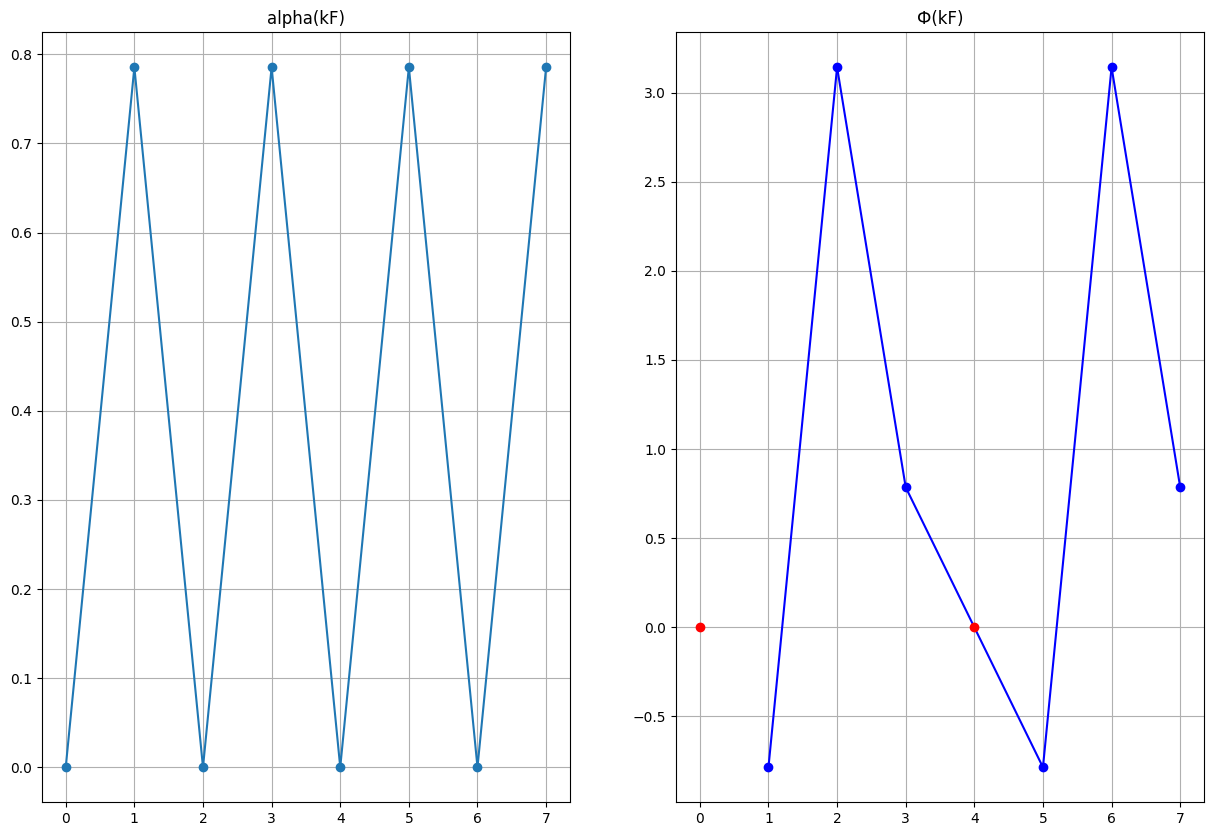

In [ ]:
alpha = []
phi = []
phi_der_pi_str = []
alpha_str = []
phi_via_alpha_str = []
# for n in range(8):
#   if(abs(np.imag(stage3_ord[n])) <= abs(np.real(stage3_ord[n])) and (np.round(abs(stage3_ord[n]), 2) != 0)):
#     alpha.append(np.arctan(abs(np.imag(stage3_ord[n])) / abs(np.real(stage3_ord[n]))))
#   elif(abs(np.imag(stage3_ord[n])) > abs(np.real(stage3_ord[n])) and (np.round(abs(stage3_ord[n]), 2) != 0)):
#     alpha.append(np.pi/2 - np.arctan(abs(np.real(stage3_ord[n])) / abs(np.imag(stage3_ord[n]))))
#   elif((np.round(abs(stage3_ord[n]),2) == 0)):
#     alpha.append(0)

#   if(alpha[n] ==  0):
#     phi.append(0)
#   elif (np.real(stage3_ord[n]) >= 0 and np.imag(stage3_ord[n]) >= 0):
#     phi.append(alpha[n])
#   elif (np.real(stage3_ord[n]) < 0 and np.imag(stage3_ord[n]) >= 0):
#     phi.append(np.pi - alpha[n])
#   elif (np.real(stage3_ord[n]) < 0 and np.imag(stage3_ord[n]) < 0):
#     phi.append(-np.pi + alpha[n])
#   elif (np.real(stage3_ord[n]) >= 0 and np.imag(stage3_ord[n]) < 0):
#     phi.append(-alpha[n])

# Verichev cycle
for n in range(8):
  stage_3_rounded = np.round(stage3_ord[n], 2)

  if (abs(np.imag(stage_3_rounded)) <= abs(np.real(stage_3_rounded)) and (abs(stage_3_rounded) != 0)):
    alpha.append(np.arctan(abs(np.imag(stage_3_rounded)) / abs(np.real(stage_3_rounded))))
    alpha_str.append(str(f'arctg({abs(np.imag(stage_3_rounded))} / {abs(np.real(stage_3_rounded))})'))
  elif (abs(np.imag(stage_3_rounded)) > abs(np.real(stage_3_rounded)) and (abs(stage_3_rounded) != 0)):
    alpha.append(np.pi/2 - np.arctan(abs(np.real(stage_3_rounded)) / abs(np.imag(stage_3_rounded))))
    alpha_str.append(str(f'arctg({abs(np.real(stage_3_rounded))} / {abs(np.imag(stage_3_rounded))})'))
  elif ((abs(stage_3_rounded) == 0)):
    alpha.append(0)
    alpha_str.append('X')

  if (np.real(stage_3_rounded) >= 0 and np.imag(stage_3_rounded) >= 0):
    phi.append(alpha[n])
    phi_via_alpha_str.append('α')
  elif (np.real(stage_3_rounded) < 0 and np.imag(stage_3_rounded) >= 0):
    phi.append(np.pi - alpha[n])
    phi_via_alpha_str.append('π - α')
  elif (np.real(stage_3_rounded) < 0 and np.imag(stage_3_rounded) < 0):
    phi.append(-np.pi + alpha[n])
    phi_via_alpha_str.append('-π + α')
  elif (np.real(stage_3_rounded) >= 0 and np.imag(stage_3_rounded) < 0):
    phi.append(-alpha[n])
    phi_via_alpha_str.append('-α')
# end Verichev cycle

for i in range(len(phi)):
  phi_der_pi_str.append('π * ' + str(Fraction(np.round(phi[i] / np.pi, 2))))

print(f'phi_der_pi_str =\n{phi_der_pi_str}')

last_table = PrettyTable()
last_table.add_rows(
    [
        ["k", 0, 1, 2, 3, 4, 5, 6, 7],
        ["Re", np.round(np.real(stage3_ord[0]),2), np.round(np.real(stage3_ord[1]),2), np.round(np.real(stage3_ord[2]),2), np.round(np.real(stage3_ord[3]),2), np.round(np.real(stage3_ord[4]),2), np.round(np.real(stage3_ord[5]),2), np.round(np.real(stage3_ord[6]),2), np.round(np.real(stage3_ord[7]),2)],
        ["Im", np.round(np.imag(stage3_ord[0]),2), np.round(np.imag(stage3_ord[1]),2), np.round(np.imag(stage3_ord[2]),2), np.round(np.imag(stage3_ord[3]),2), np.round(np.imag(stage3_ord[4]),2), np.round(np.imag(stage3_ord[5]),2), np.round(np.imag(stage3_ord[6]),2), np.round(np.imag(stage3_ord[7]),2)],
        (['Ф [rad]'] + phi),
        (['Ф via π'] + phi_der_pi_str),
        (['Ф via α'] + phi_via_alpha_str),
        (["alpha [rad]"]+ alpha),
        (["alpha via arctan"]+ alpha_str)
    ]
)

print(last_table)
plt.figure( figsize=(15, 10))
plt.subplot(121)
plt.grid()
plt.title('alpha(kF)')
plt.plot(alpha, '-o')

# plt.figure( figsize=(5, 5))
plt.subplot(122)
plt.grid()
plt.title('Ф(kF)')
for i in range(len(phi)):
  if(phi[i] == 0):
    continue
  else:
    plt.plot(i, phi[i], 'bo')
    if(i > 0 and phi[i-1] != 0):
      plt.plot([i-1, i], [phi[i-1], phi[i]], '-b')
    elif(i > 1 and phi[i-1] == 0):
      plt.plot([i-2, i], [phi[i-2], phi[i]], '-b')

for i in range(len(phi)):
  if(phi[i] == 0):
    plt.plot(i, phi[i], 'ro')
  # else:
    # plt.plot(i, phi[i], 'bo')